In [2]:
import pandas as pd


df = pd.read_csv('/content/tips (data for regression problem).csv')


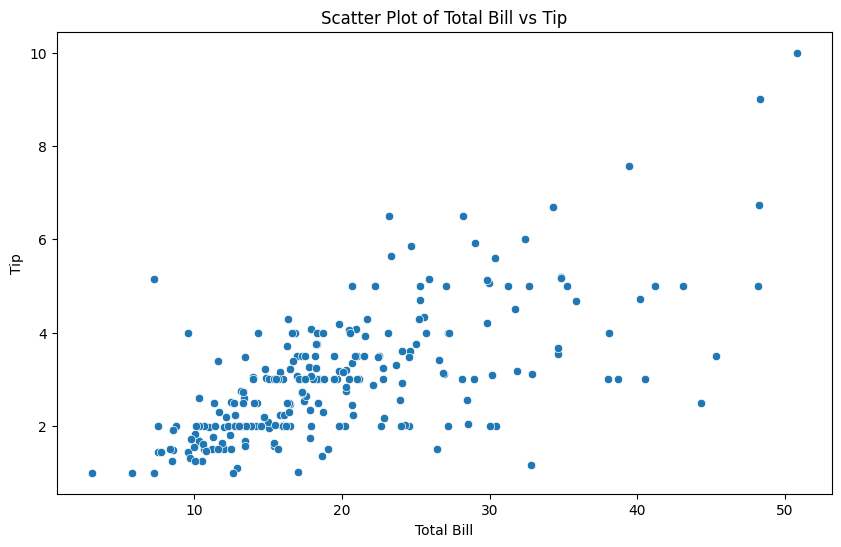

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between 'total_bill' and 'tip'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


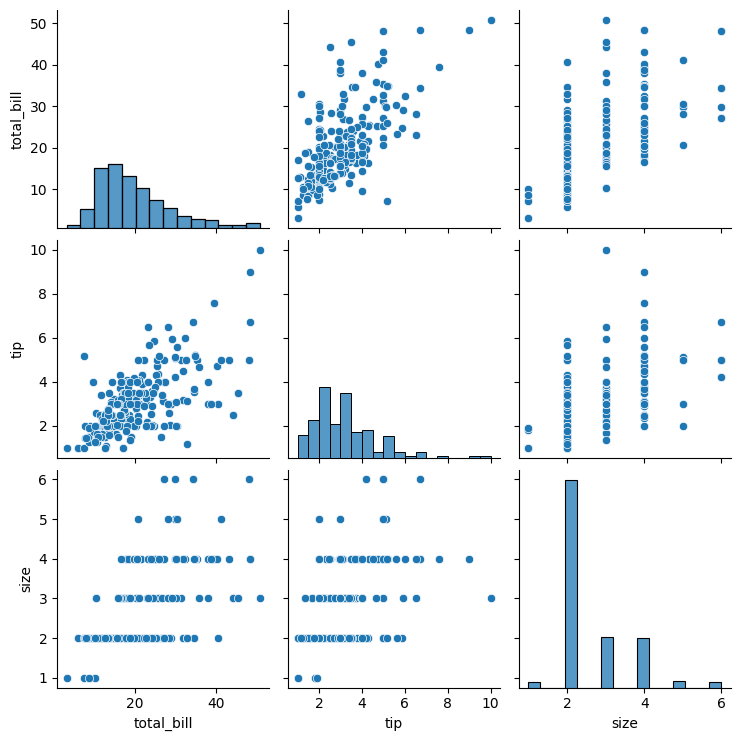

In [4]:

sns.pairplot(df)
plt.show()


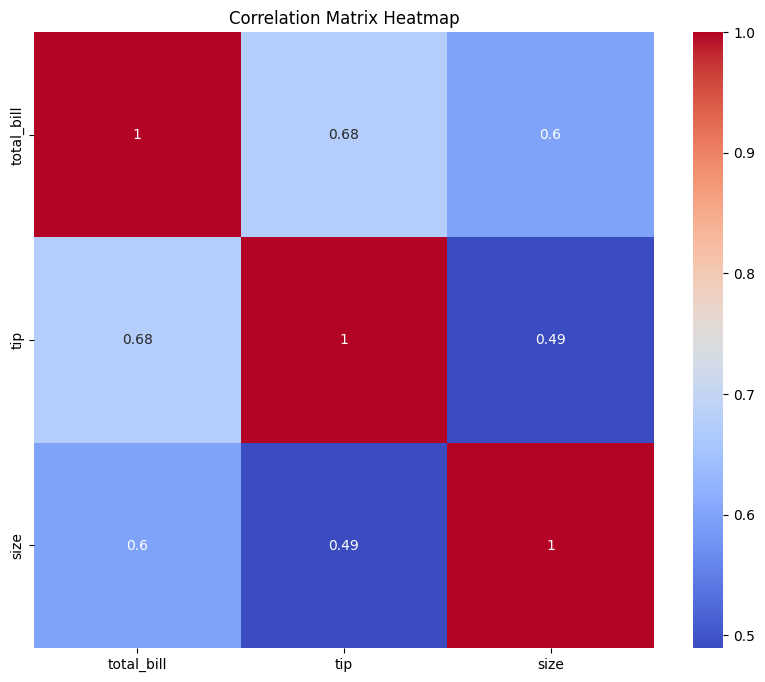

In [6]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('tip', axis=1)
y = df_encoded['tip']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors Regression": KNeighborsRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"{model_name} Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}\n")


Linear Regression R2 Score: 0.4373
Linear Regression Mean Squared Error: 0.7034

Ridge Regression R2 Score: 0.4383
Ridge Regression Mean Squared Error: 0.7021

Lasso Regression R2 Score: -0.1590
Lasso Regression Mean Squared Error: 1.4487

Decision Tree Regression R2 Score: 0.0109
Decision Tree Regression Mean Squared Error: 1.2364

Random Forest Regression R2 Score: 0.2861
Random Forest Regression Mean Squared Error: 0.8924

Support Vector Regression R2 Score: 0.3787
Support Vector Regression Mean Squared Error: 0.7765

K-Nearest Neighbors Regression R2 Score: 0.2776
K-Nearest Neighbors Regression Mean Squared Error: 0.9029



Feature ranking:
1. total_bill (0.7781285917605962)
2. smoker_Yes (0.07016800006012944)
3. size (0.05428012088710542)
4. day_Sat (0.029518776567099784)
5. day_Sun (0.024229163964909175)
6. sex_Male (0.020418535634240977)
7. time_Lunch (0.0116889635286258)
8. day_Thur (0.011567847597293228)


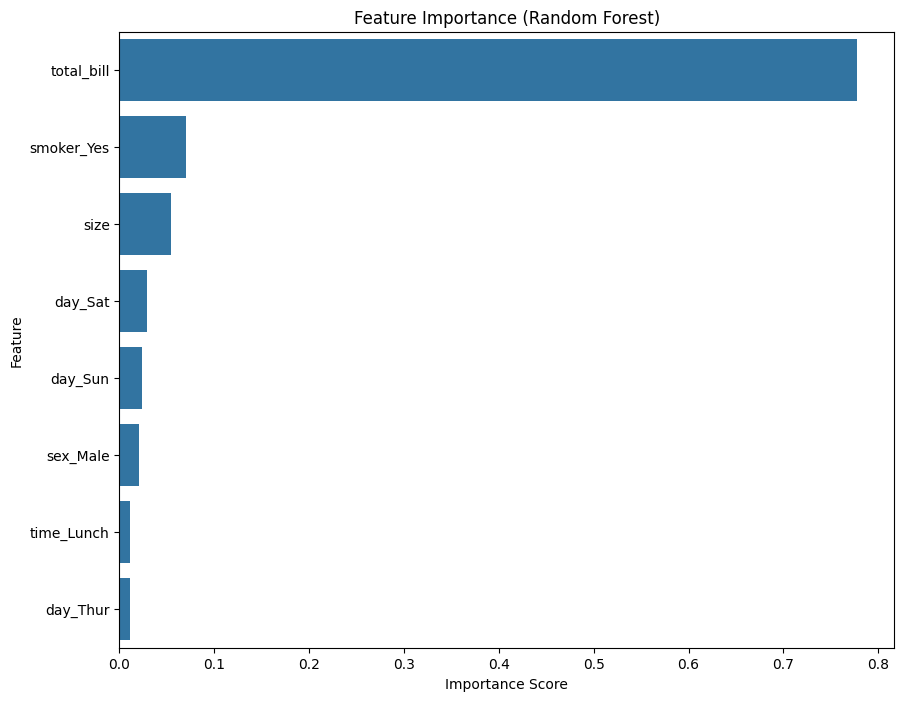

In [9]:
import numpy as np

# For Random Forest feature importance
rf = RandomForestRegressor().fit(X_train, y_train)
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

# Print and visualize feature importance
print("Feature ranking:")
for f in range(len(features)):
    print(f"{f + 1}. {features[indices[f]]} ({feature_importances[indices[f]]})")

# Plotting feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[indices], y=[features[i] for i in indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
